In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math


class GP_RFF:
  def __init__(self, in_dim, M, sigma=1.0, alpha=1.0, beta=10.0 ):
    self.sigma = sigma
    self.alpha = alpha
    self.beta = beta
    
    self.M = M
    self.D = in_dim
    self.K = np.random.randn(self.D,self.M)*self.sigma
    self.B = np.random.random(self.D)*np.pi

  def phi( self, xt ):
    return np.cos(np.dot(xt,self.K)+self.B) * math.sqrt(2/self.M)

  def learn(self, xt, yt ):
    self.xt = np.array(xt)
    self.yt = np.array(yt)
    N = len(xt)

    # 基底関数で写像
    feat = self.phi( self.xt )

    # 線形回帰の重みを計算
    #self.W = np.linalg.solve( np.dot(feat.T, feat), np.dot(feat.T, self.yt) )

    # ベイズ線形回帰
    self.S = np.linalg.inv(self.alpha * np.eye(self.M) + self.beta * np.dot(feat.T, feat))
    self.mu = self.beta * np.dot(self.S, np.dot(feat.T, self.yt))


  def predict( self, x ):
    feat = self.phi(x)
    return np.dot( feat, self.mu ), 1/self.beta + np.diag(np.dot(np.dot(feat,self.S), feat.T))

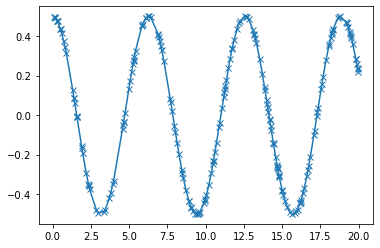

In [10]:
xt = np.sort(np.random.rand(200)*20)
yt = np.cos(xt)/2

plt.plot( xt, yt, "x-" )

In [11]:
gp = GP_RFF(1, 20)

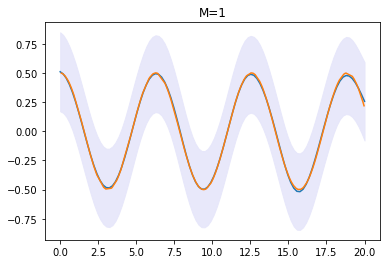

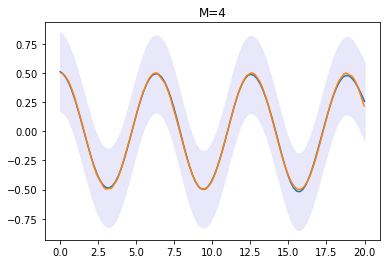

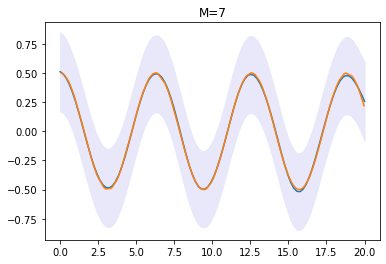

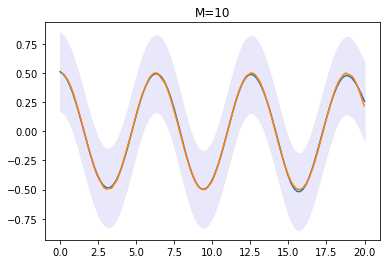

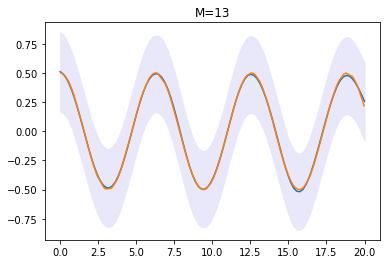

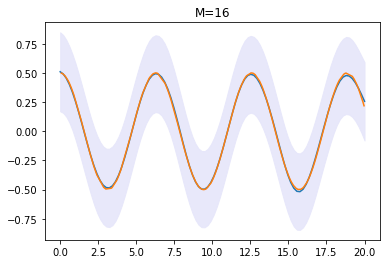

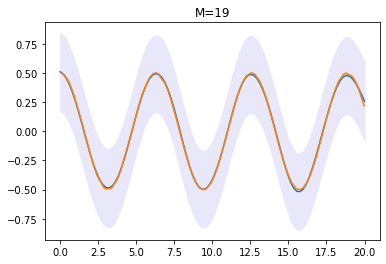

In [13]:
x = np.linspace( 0,20,100 )

for M in range(1,20,3):
    gp.learn( xt.reshape((-1,1)), yt )
    mu, sigma = gp.predict( x.reshape(-1,1) )
    plt.plot( x, mu )

    y_max = mu.flatten() + np.sqrt(sigma)
    y_min = mu.flatten() - np.sqrt(sigma)

    plt.fill_between(x, y_min, y_max, facecolor="lavender" , alpha=0.9 , edgecolor="lavender"  )
    plt.plot(xt, yt)
    plt.title( f"M={M}" )
    plt.show()